### EXP 04: A Charging Dataset

In [9]:
# This script shows how to call `run_domain_detector`
# and save / print the results with detailed history visualization

import os
import sys
import json
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# # ------------------------------------------------------------------
# # 1. Make sure Python can find your agent package / module
# #    (adapt the path if your repo layout is different)
# # ------------------------------------------------------------------
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(ROOT_DIR)

from agents.d2insight_agent_sys import run_domain_detector   # noqa: E402

In [10]:
def visualize_history(result):
    """
    Visualize the domain detection history across iterations.
    
    Args:
        result: The result from run_domain_detector
    """
    if not result or "history" not in result or not result["history"]:
        print("No history data available")
        return
    
    # Convert history to DataFrame for easier manipulation
    history_df = pd.DataFrame(result["history"])
    
    # Print a nice tabular summary
    print("\n=== DOMAIN DETECTION HISTORY ===")
    
    for i, entry in enumerate(result["history"]):
        iteration = entry.get("iteration", i)
        print(f"\n📊 ITERATION {iteration}")
        print(f"📌 Domain: {entry.get('domain', 'Unknown')}")
        
        # Format scores if they exist
        scores = entry.get("scores", {})
        if scores:
            print("📈 Scores:")
            for score_name, score_value in scores.items():
                stars = "★" * score_value + "☆" * (4 - score_value)
                print(f"   {score_name.ljust(15)}: {stars} ({score_value}/4)")
                
        # Print analysis snippet
        analysis_head = entry.get("analysis_head", "")
        if analysis_head:
            print(f"📝 Analysis: {analysis_head}...")
            
    # Plot score evolution if more than one iteration with scores
    scored_entries = [entry for entry in result["history"] if entry.get("scores")]
    if len(scored_entries) > 1:
        plt.figure(figsize=(10, 6))
        
        # Prepare data for plotting
        iterations = []
        score_data = {}
        
        for entry in scored_entries:
            iter_num = entry.get("iteration", 0)
            iterations.append(iter_num)
            
            for score_name, score_value in entry.get("scores", {}).items():
                if score_name not in score_data:
                    score_data[score_name] = []
                score_data[score_name].append(score_value)
        
        # Plot each score metric
        for score_name, values in score_data.items():
            plt.plot(iterations, values, marker='o', label=score_name)
            
        plt.title("Evolution of Scores Across Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Score (0-4)")
        plt.ylim(0, 4.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.xticks(iterations)  # Set x-axis ticks to integer iterations
        plt.show()

def run_and_visualize(csv_path, max_cycles=5):
    """
    Run domain detector and visualize results with history.
    
    Args:
        csv_path: Path to the CSV file
        max_cycles: Maximum number of improvement cycles
    
    Returns:
        The complete result from the domain detector
    """
    print(f"🚀 Running domain detector on {csv_path} with max_cycles={max_cycles}")
    
    # Run the domain detector
    result = run_domain_detector(csv_path, max_cycles)
    
    # Visualize history
    visualize_history(result)
    
    # Print final results
    if "analysis" in result:
        analysis = result["analysis"]
        print("\n=== FINAL RESULTS ===")
        print(f"✅ Domain: {analysis.get('domain', 'Unknown')}")
        print(f"✅ Core Concepts: {', '.join(analysis.get('core_concepts', []))}")
        
        if "analysis" in analysis:
            print("\n📊 DESCRIPTIVE ANALYSIS:")
            print(analysis["analysis"].get("descriptive", ""))
            
            print("\n🔮 PREDICTIVE ANALYSIS:")
            print(analysis["analysis"].get("predictive", ""))
            
            print("\n🌐 DOMAIN-RELATED ANALYSIS:")
            print(analysis["analysis"].get("domain_related", ""))
    
    return result

🚀 Running domain detector on /Volumes/移动硬盘/Projects/EV/结题分析/2025数据/加工数据/成都_合并结果_20250814_114243.csv with max_cycles=5
Successfully read CSV: 286 rows, 56 columns
Data profile built successfully
Starting analysis with max_cycles=5
domain_node {'profile': {'raw': {'n_rows': 286, 'n_cols': 56, 'columns': {'充电站': {'dtype': 'object', 'unique_ratio': 0.2483, 'sample': ['0', '0', '0', '   四川省成都市生物研究所宿舍停车场充电站（内部使用）', '   四川省成都市生物研究所宿舍停车场充电站（内部使用）']}, '运维单位编码': {'dtype': 'int64', 'unique_ratio': 0.0105, 'sample': ['0', '0', '0', '3000020000000', '3000020000000'], 'min': np.int64(0), 'max': np.int64(3000020000000), 'mean': np.float64(2821843986944.056), 'std': np.float64(710005211067.1898)}, '当前月份': {'dtype': 'int64', 'unique_ratio': 0.0175, 'sample': ['2', '3', '4', '2', '3'], 'min': np.int64(2), 'max': np.int64(6), 'mean': np.float64(4.0175), 'std': np.float64(1.4178)}, '对比月份': {'dtype': 'int64', 'unique_ratio': 0.0175, 'sample': ['1', '2', '3', '1', '2'], 'min': np.int64(1), 'max': np.int64(5

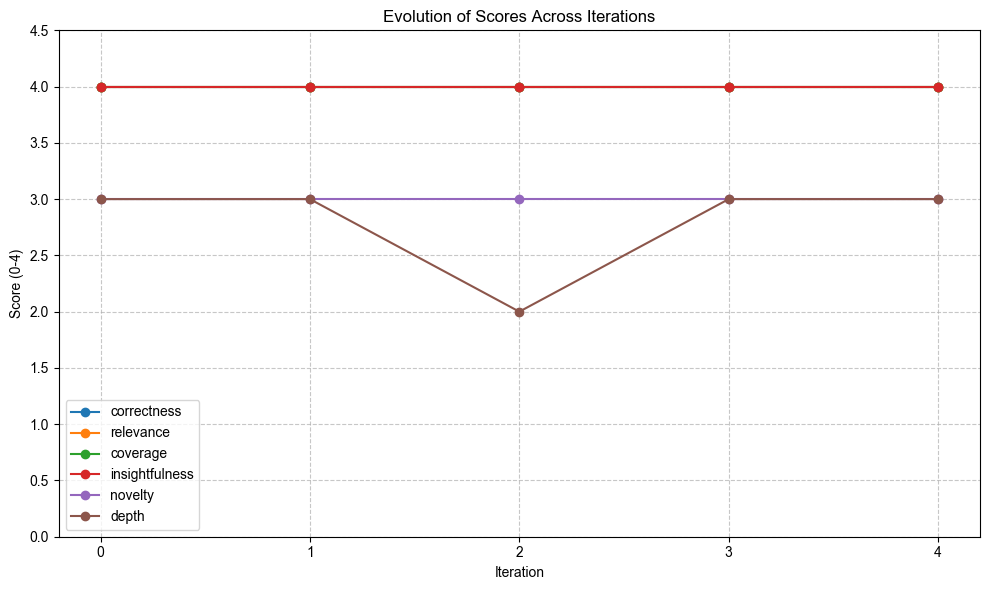


=== FINAL RESULTS ===
✅ Domain: Electric Vehicle Charging Infrastructure
✅ Core Concepts: EV Charging Station Utilization, Energy Consumption Patterns, Order Channel Analysis, Geographic Distribution of Charging Stations, Socioeconomic Factors in EV Adoption, Renewable Energy Integration in EV Charging

📊 DESCRIPTIVE ANALYSIS:
The dataset reveals significant variance in EV charging station utilization across different order channels and geographic locations. For instance, the 'e充电微信小程序' channel shows high variability in usage, with changes in transaction counts ranging from -1440 to 3346, and a maximum growth rate of 5369.23%. Energy consumption patterns also exhibit stark contrasts, with '谷电量' showing extreme fluctuations, including a maximum change rate of 156,644.44%. Additionally, certain stations are exclusively for internal use, limiting their contribution to broader EV adoption trends.

🔮 PREDICTIVE ANALYSIS:
Based on the observed trends, stations with higher '谷电量' usage are li

{'profile': {'raw': {'n_rows': 286,
   'n_cols': 56,
   'columns': {'充电站': {'dtype': 'object',
     'unique_ratio': 0.2483,
     'sample': ['0',
      '0',
      '0',
      '   四川省成都市生物研究所宿舍停车场充电站（内部使用）',
      '   四川省成都市生物研究所宿舍停车场充电站（内部使用）']},
    '运维单位编码': {'dtype': 'int64',
     'unique_ratio': 0.0105,
     'sample': ['0', '0', '0', '3000020000000', '3000020000000'],
     'min': np.int64(0),
     'max': np.int64(3000020000000),
     'mean': np.float64(2821843986944.056),
     'std': np.float64(710005211067.1898)},
    '当前月份': {'dtype': 'int64',
     'unique_ratio': 0.0175,
     'sample': ['2', '3', '4', '2', '3'],
     'min': np.int64(2),
     'max': np.int64(6),
     'mean': np.float64(4.0175),
     'std': np.float64(1.4178)},
    '对比月份': {'dtype': 'int64',
     'unique_ratio': 0.0175,
     'sample': ['1', '2', '3', '1', '2'],
     'min': np.int64(1),
     'max': np.int64(5),
     'mean': np.float64(3.0175),
     'std': np.float64(1.4178)},
    '交易流水号_数量_当前值': {'dtype': 'int64',
  

In [11]:
# Example usage:
result = run_and_visualize("/Volumes/移动硬盘/Projects/EV/结题分析/2025数据/加工数据/成都_合并结果_20250814_114243.csv", max_cycles=5)

result

In [12]:
# If you want to save the results to a file:
from agents.d2insight_agent_sys import NumpyEncoder


with open("exp04_d2insight_qwen35plus_charge_output.json", "w") as f:
    json.dump(result, f, indent=2, cls=NumpyEncoder, ensure_ascii=False)